In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import numpy as np
import jax
import jax.numpy as jnp
import matplotlib.pyplot as plt
from matplotlib import colormaps
from pathlib import Path
import rerun as rr
from b3d.utils import keysplit


key = jax.random.PRNGKey(0)

In [3]:
def homogeneous(u): return jnp.concatenate([u, jnp.ones(u.shape[:-1] + (1,))], axis=-1)
hom = homogeneous

def base_point(ell):
    return jnp.array([0, - ell[2]/ell[1]])

def normal_vec(ell):
    return ell[:2]/jnp.linalg.norm(ell[:2])

def direction_vec(ell):
    return jnp.array([-ell[1],ell[0]])/jnp.linalg.norm(ell[:2])

def distance_to_line(uv, ell):
    s = (uv[...,0]*ell[...,0] + uv[...,1]*ell[...,1] + ell[...,2])/jnp.sqrt(ell[...,0]**2 + ell[...,1]**2)
    return jnp.abs(s)

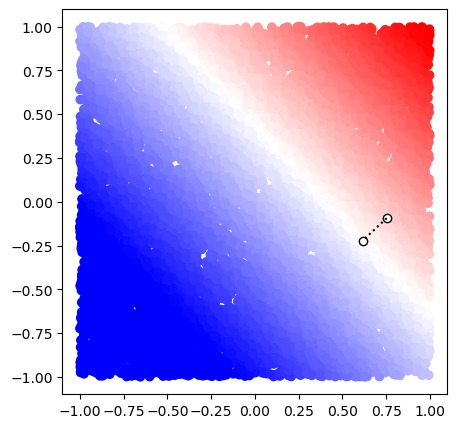

In [6]:
key = keysplit(key)
ell = jax.random.normal(key, (3,))
ell = ell/jnp.linalg.norm(ell)
x = jnp.array([*jax.random.uniform(key, (2,), minval=-1, maxval=1), 1.])
xs = jax.random.uniform(key, (10_000, 2), minval=-1, maxval=1)

d = -jnp.sign(jnp.dot(x,ell))*distance_to_line(x, ell)
cs = jnp.dot(hom(xs), ell)

# =============================================
fig, ax = plt.subplots(1,1, figsize=(10,5))    

ax.set_aspect('equal', adjustable='box')
ax.scatter(xs[:, 0], xs[:, 1], c=cs, alpha=1., vmin=-1, vmax=1, cmap='bwr')   
ax.scatter(x[0], x[1], c='w', edgecolor="k")
ax.scatter(x[0] + d*ell[0]/jnp.linalg.norm(ell[:2]), 
           x[1] + d*ell[1]/jnp.linalg.norm(ell[:2]), c='w', edgecolor="k")
ax.plot([x[0], x[0] + d*ell[0]/jnp.linalg.norm(ell[:2])], 
        [x[1], x[1] + d*ell[1]/jnp.linalg.norm(ell[:2])], c='k', linestyle=":");

[[1.         0.44188517]
 [0.17087679 1.        ]] True


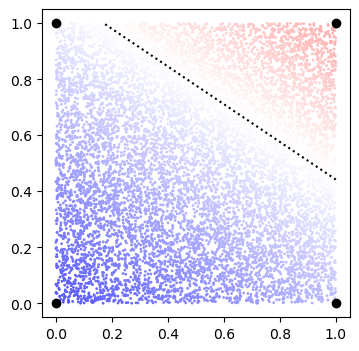

In [11]:
def intersect_line_with_image(ell, h, w):
    left   = jnp.array([0, -ell[2]/ell[1]])
    right  = jnp.array([w, -(w*ell[0] + ell[2])/ell[1]])
    bottom = jnp.array([-ell[2]/ell[0], 0])
    top    = jnp.array([-(h*ell[1] + ell[2])/ell[0], h])
    points = [left, right, bottom, top]
    points = [p for p in points if 0 <= p[0] <= w and 0 <= p[1] <= h]
    if len(points) == 2:
        return jnp.array(points), True
    else:
        return jnp.array([jnp.inf, jnp.inf]), False


key = keysplit(key)
ell = jax.random.normal(key, (3,))
ell = ell/jnp.linalg.norm(ell)
xs = jax.random.uniform(key, (10_000, 2), minval=0, maxval=1)

pts, valid = intersect_line_with_image(ell, 1, 1)
print(pts, valid)

# ================================
fig, ax = plt.subplots(1,1, figsize=(4,4))    

ax.set_aspect('equal', adjustable='box')
ax.scatter(xs[:, 0], xs[:, 1], c=jnp.dot(hom(xs), ell), alpha=1., vmin=-1, vmax=1, cmap='bwr', s=1)   
ax.scatter([0,1,1,0], [0,0,1,1], c='k', )

if valid: ax.plot(pts[:,0], pts[:,1], c='k', linestyle=":")